# Predict arrival delay with sklearn
# ----------------------------------------------

# Data loading

In [1]:
BASIC_PATH = '../Data/'
ALL_FILES = BASIC_PATH + '*.csv'

import pandas as pd
import numpy as np
import glob as glob

def readAllFiles():
    files = glob.glob(ALL_FILES)
    frames = []

    for file in files:
        df = pd.read_csv(file, index_col = 0)
        frames.append(df)

    return pd.concat(frames)

df = readAllFiles()

# Remove columns not necessary for machine learning

In [2]:
df['month'] = pd.to_datetime(df.date).map(lambda x: x.month)

In [3]:
df = df.drop(['date', 
              'airline_code', 
              'departure_airport', 
              'departure_lat', 
              'departure_lon', 
              'departure_schedule', 
              'arrival_airport', 
              'arrival_lat', 
              'arrival_lon', 
              'arrival_schedule', 
              'departure_actual', 
              'arrival_actual', 
              'arrival_tz', 
              'departure_tz'], axis=1)

In [4]:
df.columns

Index(['airline', 'departure_state', 'arrival_state', 'departure_delay',
       'arrival_delay', 'duration', 'distance', 'speed', 'month'],
      dtype='object')

# Split into test and train, split into x and y, use pandas.get_dummies

In [5]:
from sklearn.model_selection import train_test_split
import gc

X = df.loc[:,['airline', 
              'departure_state', 
              'departure_delay',
              'distance', 
              'speed', 
              'month']]
X = pd.get_dummies(X, columns=['airline', 
                               'departure_state', 
                               'month'])
#TODO add arrival_state? => memory problem
#TODO add duration => not float problem

y = df.loc[:,['arrival_delay']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#make place in memory
del df
del X
del y
gc.collect()

81

# Random Forest Regressor model (good model)

### Make model

In [7]:
from sklearn.ensemble import RandomForestRegressor

rfrm = RandomForestRegressor()
rfrm.fit(X_train, y_train.values.ravel())

rfrm_y_predict = rfrm.predict(X_test)

### Test model

Mean squared error: 173.43
Mean absolute error: 9.17
Variance score: 0.86946


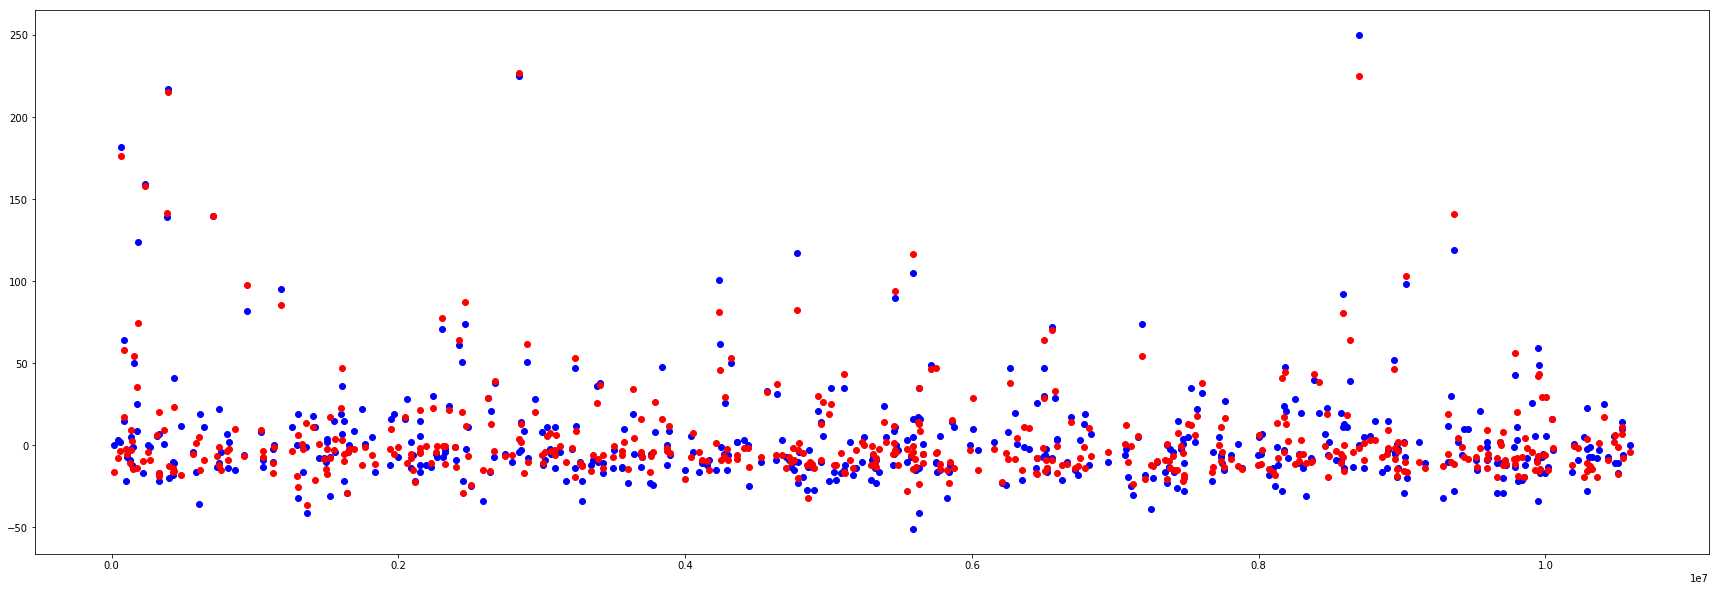

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rfrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, rfrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, rfrm_y_predict))

#Graph
plt.scatter(y_test.iloc[:500,:].index, y_test.iloc[:500,:].arrival_delay, c='b')
predictDf = pd.DataFrame( data=rfrm_y_predict, index=y_test.index)
plt.scatter(predictDf.iloc[:500,:].index, predictDf.iloc[:500,0], c='r')
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

# Linear Regression model (best model)

### Make model

In [7]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train)

lrm_y_predict = lrm.predict(X_test)

### Test model

Mean squared error: 154.39
Mean absolute error: 8.69
Variance score: 0.88379


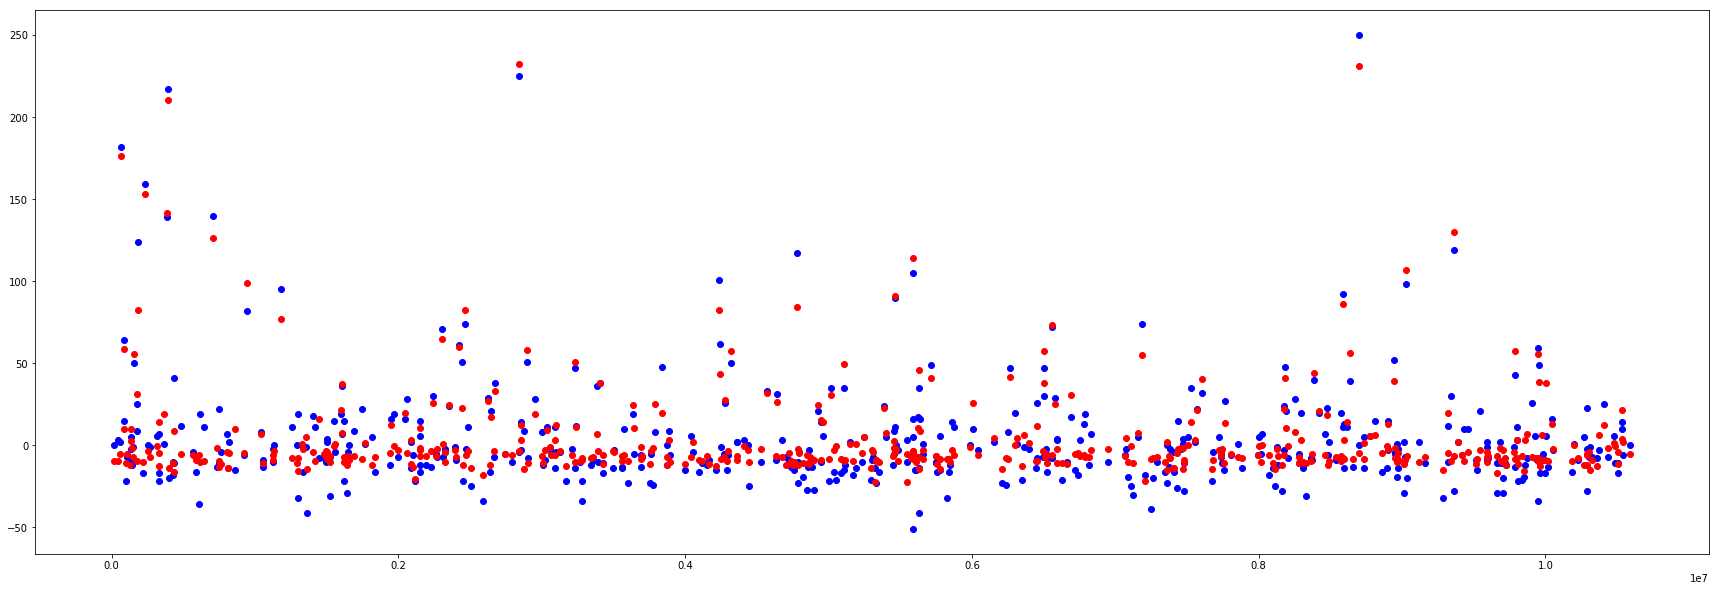

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, lrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, lrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, lrm_y_predict))

#Graph
plt.scatter(y_test.iloc[:500,:].index, y_test.iloc[:500,:].arrival_delay, c='b')
predictDf = pd.DataFrame( data=lrm_y_predict, index=y_test.index)
plt.scatter(predictDf.iloc[:500,:].index, predictDf.iloc[:500,0], c='r')
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

# Ridge Regression model (good model if alpha is small)

### Make model

In [36]:
from sklearn.linear_model import Ridge

rrm = Ridge(alpha=0.01, normalize=True)
rrm.fit(X_train, y_train.values.ravel())

rrm_y_predict = rrm.predict(X_test)

### Test model

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, rrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, rrm_y_predict))

Mean squared error: 154.50
Mean absolute error: 8.69
Variance score: 0.88371


# Lasso Regression model (bad model)

### Make model

In [44]:
from sklearn.linear_model import Lasso

lrm = Lasso(alpha=0.01, normalize=True)
lrm.fit(X_train, y_train.values.ravel())

lrm_y_predict = lrm.predict(X_test)

### Test model

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, lrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, lrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, lrm_y_predict))

Mean squared error: 949.34
Mean absolute error: 17.65
Variance score: 0.28543
